In [1]:
import plumed
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import MDAnalysis
import numpy as np
import math

In [2]:
# set working directory for all future cells
os.chdir("/Users/max/build/PLUMED/plumed-masterclass/masterclass-21-7")
# and check with bash command pwd - note the exclamation mark at the beginning
!pwd
# or in python
os.getcwd()

/Users/max/build/PLUMED/plumed-masterclass/masterclass-21-7


'/Users/max/build/PLUMED/plumed-masterclass/masterclass-21-7'

In [3]:
%%bash
# Exercise 2
# create directory for this exercise
mkdir Exercise-2; cd Exercise-2

# Time GROMACS alone
# using 4 CPU cores - OpenMP parallelization + 1 GPU
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2A; cd run_2A

# run GROMACS
#gmx_mpi mdrun -s ../../data/exercise2/topol.tpr -nsteps 100000 -pin on -noddcheck -ntomp 4

# extract performances
grep Perf -B1 md.log

                 (ns/day)    (hour/ns)
Performance:      766.272        0.031


mkdir: Exercise-2: File exists
mkdir: run_2A: File exists


In [4]:
%%bash
# Exercise 2
cd Exercise-2

# Time MetaD using provided input file
# using 4 CPU cores - OpenMP parallelization + 1 GPU
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2B; cd run_2B

# link useful files here
ln -s ../../data/exercise2/* . 2>/dev/null

# run GROMACS
#gmx_mpi mdrun -s topol.tpr -plumed plumed.dat -nsteps 100000 -pin on -noddcheck -ntomp 4

# extract performances
tail -n 15 md.log


               Core t (s)   Wall t (s)        (%)
       Time:     1155.875      288.970      400.0
                 (ns/day)    (hour/ns)
Performance:       14.950        1.605
Finished mdrun on rank 0 Tue Apr 27 08:56:04 2021

PLUMED:                                               Cycles        Total      Average      Minimum      Maximum
PLUMED:                                                    1   281.577806   281.577806   281.577806   281.577806
PLUMED: 1 Prepare dependencies                        100001     3.118821     0.000031     0.000029     0.000860
PLUMED: 2 Sharing data                                100001     0.425394     0.000004     0.000004     0.000079
PLUMED: 3 Waiting for data                            100001     0.046471     0.000000     0.000000     0.000007
PLUMED: 4 Calculating (forward loop)                  100001   147.393191     0.001474     0.001400     0.002363
PLUMED: 5 Applying (backward loop)                    100001   127.418219     0.001274     0

mkdir: run_2B: File exists


In [5]:
%%bash
# Exercise 2
cd Exercise-2

# Time MetaD using optimized input file
# using 4 CPU cores - OpenMP parallelization + 1 GPU
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2C; cd run_2C

# create PLUMED optimized input file
cat > "plumed_opt.dat" << EOF
# reconstruct molecule
WHOLEMOLECULES ENTITY0=1-330

# CA-RMSDs from the two reference conformations
rmsd_A: RMSD REFERENCE=stateA.pdb TYPE=OPTIMAL NOPBC
rmsd_B: RMSD REFERENCE=stateB.pdb TYPE=OPTIMAL NOPBC

cv: COORDINATION ...
NOPBC 
GROUPA=1,1,1,2,2,2,2,2,3,3,3,3,4,5,5,6,9,10,10,10,10,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,16,16,16,16,16,18,18,18,18,19,21,22,22,22,22,22,22,24,25,25,25,27,27,27,27,27,27,27,27,28,28,28,28,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,32,32,32,32,32,32,34,34,34,38,39,41,41,41,47,47,47,48,48,48,52,52,57,57,60,62,62,63,63,63,66,68,68,68,68,83,84,84,84,84,84,84,89,89,89,93,95,98,101,101,101,101,101,101,103,103,104,104,104,104,104,104,104,105,107,107,107,107,107,108,109,109,110,111,111,114,114,114,114,114,114,114,116,116,116,116,119,119,119,120,120,120,120,120,126,126,126,126,128,128,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,133,133,133,133,133,135,140,141,141,141,141,141,144,144,144,144,145,145,145,145,149,149,149,149,151,151,153,153,153,153,153,153,154,154,154,158,160,160,160,160,162,166,166,166,169,169,169,174,174,174,174,174,174,174,176,176,176,176,176,178,178,178,178,180,180,180,184,186,186,186,186,188,188,188,189,189,189,191,191,191,191,191,191,193,193,193,193,195,195,196,197,197,197,197,197,200,200,200,200,200,202,202,202,204,204,204,204,204,205,205,207,207,207,207,207,209,209,209,209,210,211,212,212,212,212,212,212,212,212,213,213,213,213,216,216,216,216,218,218,218,220,220,220,220,220,220,220,221,221,221,223,223,223,223,223,223,225,225,225,226,226,232,232,232,232,232,235,235,235,236,236,236,236,237,239,239,239
GROUPB=110,115,122,106,108,110,112,115,95,96,98,102,112,95,98,112,123,95,102,106,115,106,108,112,115,123,203,205,92,102,103,104,106,113,202,205,208,92,94,96,102,106,82,92,94,96,96,78,79,80,92,94,96,99,205,78,82,92,60,68,70,72,78,82,84,92,60,68,70,311,82,92,102,104,205,310,311,60,68,82,84,92,104,221,309,310,311,68,70,72,78,82,92,70,72,75,71,73,72,74,75,58,71,74,70,71,72,69,71,86,87,221,218,221,236,237,279,295,82,84,93,221,229,217,218,219,221,229,231,229,231,237,229,229,229,215,217,219,224,229,231,215,224,202,204,208,215,217,219,220,203,201,202,208,210,215,202,210,213,210,213,215,133,199,201,203,208,210,215,199,201,203,204,192,199,201,188,203,204,205,327,194,199,201,208,286,287,194,196,197,199,206,284,300,199,208,210,212,213,285,286,287,192,194,196,197,199,196,199,187,192,194,195,196,185,187,192,195,185,187,189,199,185,187,195,196,195,196,170,175,176,177,185,195,177,179,182,177,175,177,186,328,189,189,327,328,186,188,328,313,315,316,317,323,325,328,313,315,317,323,328,315,317,319,323,317,319,320,328,303,313,315,323,310,313,315,323,327,328,300,302,303,307,310,313,300,302,307,310,302,303,303,284,291,301,302,303,300,302,307,310,313,300,307,310,300,302,307,310,313,310,313,281,283,291,300,310,281,283,285,291,287,267,267,270,274,281,283,285,287,288,267,270,287,288,274,278,281,291,278,279,281,278,279,281,283,291,293,300,278,279,293,264,266,274,277,278,281,266,267,268,268,271,266,268,274,277,278,266,274,278,274,277,278,279,279,256,258,265
PAIR SWITCH={CUSTOM FUNC=1-erf(x^4) R_0=1.0}
...

# metadynamics parameters
metad: METAD ARG=cv ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 60
  PACE=500 HEIGHT=1.2 BIASFACTOR=60
  # Gaussian width (sigma) based on the CV fluctuations in unbiased run
  SIGMA=10.0
  # Gaussians will be written to file
  FILE=HILLS
...

# print useful stuff
PRINT ARG=cv,rmsd_A,rmsd_B,metad.bias STRIDE=500 FILE=COLVAR
EOF

# link useful files here
ln -s ../../data/exercise2/* . 2>/dev/null

# Time MetaD using optimize PLUMED input file (using 4 cores)
#gmx_mpi mdrun -s topol.tpr -plumed plumed_opt.dat -nsteps 100000 -pin on -noddcheck -ntomp 4

# extract performances
tail -n 15 md.log


               Core t (s)   Wall t (s)        (%)
       Time:       54.486       13.622      400.0
                 (ns/day)    (hour/ns)
Performance:      317.132        0.076
Finished mdrun on rank 0 Tue Apr 27 09:28:48 2021

PLUMED:                                               Cycles        Total      Average      Minimum      Maximum
PLUMED:                                                    1     7.225220     7.225220     7.225220     7.225220
PLUMED: 1 Prepare dependencies                        100001     0.062965     0.000001     0.000001     0.000010
PLUMED: 2 Sharing data                                100001     0.187364     0.000002     0.000002     0.000087
PLUMED: 3 Waiting for data                            100001     0.045188     0.000000     0.000000     0.000008
PLUMED: 4 Calculating (forward loop)                  100001     4.075646     0.000041     0.000037     0.000818
PLUMED: 5 Applying (backward loop)                    100001     0.895213     0.000009     0

mkdir: run_2C: File exists


In [6]:
%%bash
# Check definition of CV
head -n 2 Exercise-2/run_2B/COLVAR Exercise-2/run_2C/COLVAR

==> Exercise-2/run_2B/COLVAR <==
#! FIELDS time cv rmsd_A rmsd_B metad.bias
 0.000000 55.990713 1.240984 1.202054 0.000000

==> Exercise-2/run_2C/COLVAR <==
#! FIELDS time cv rmsd_A rmsd_B metad.bias
 0.000000 55.990713 1.240984 1.202054 0.000000


In [7]:
%%bash
# Exercise 2
cd Exercise-2

# Run production MetaD using optimized input file
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2D; cd run_2D

# create PLUMED optimized input file
cat > "plumed_opt.dat" << EOF
# reconstruct molecule
WHOLEMOLECULES ENTITY0=1-330

# CA-RMSDs from the two reference conformations
rmsd_A: RMSD REFERENCE=stateA.pdb TYPE=OPTIMAL NOPBC
rmsd_B: RMSD REFERENCE=stateB.pdb TYPE=OPTIMAL NOPBC

cv: COORDINATION ...
NOPBC 
GROUPA=1,1,1,2,2,2,2,2,3,3,3,3,4,5,5,6,9,10,10,10,10,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,16,16,16,16,16,18,18,18,18,19,21,22,22,22,22,22,22,24,25,25,25,27,27,27,27,27,27,27,27,28,28,28,28,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,32,32,32,32,32,32,34,34,34,38,39,41,41,41,47,47,47,48,48,48,52,52,57,57,60,62,62,63,63,63,66,68,68,68,68,83,84,84,84,84,84,84,89,89,89,93,95,98,101,101,101,101,101,101,103,103,104,104,104,104,104,104,104,105,107,107,107,107,107,108,109,109,110,111,111,114,114,114,114,114,114,114,116,116,116,116,119,119,119,120,120,120,120,120,126,126,126,126,128,128,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,133,133,133,133,133,135,140,141,141,141,141,141,144,144,144,144,145,145,145,145,149,149,149,149,151,151,153,153,153,153,153,153,154,154,154,158,160,160,160,160,162,166,166,166,169,169,169,174,174,174,174,174,174,174,176,176,176,176,176,178,178,178,178,180,180,180,184,186,186,186,186,188,188,188,189,189,189,191,191,191,191,191,191,193,193,193,193,195,195,196,197,197,197,197,197,200,200,200,200,200,202,202,202,204,204,204,204,204,205,205,207,207,207,207,207,209,209,209,209,210,211,212,212,212,212,212,212,212,212,213,213,213,213,216,216,216,216,218,218,218,220,220,220,220,220,220,220,221,221,221,223,223,223,223,223,223,225,225,225,226,226,232,232,232,232,232,235,235,235,236,236,236,236,237,239,239,239
GROUPB=110,115,122,106,108,110,112,115,95,96,98,102,112,95,98,112,123,95,102,106,115,106,108,112,115,123,203,205,92,102,103,104,106,113,202,205,208,92,94,96,102,106,82,92,94,96,96,78,79,80,92,94,96,99,205,78,82,92,60,68,70,72,78,82,84,92,60,68,70,311,82,92,102,104,205,310,311,60,68,82,84,92,104,221,309,310,311,68,70,72,78,82,92,70,72,75,71,73,72,74,75,58,71,74,70,71,72,69,71,86,87,221,218,221,236,237,279,295,82,84,93,221,229,217,218,219,221,229,231,229,231,237,229,229,229,215,217,219,224,229,231,215,224,202,204,208,215,217,219,220,203,201,202,208,210,215,202,210,213,210,213,215,133,199,201,203,208,210,215,199,201,203,204,192,199,201,188,203,204,205,327,194,199,201,208,286,287,194,196,197,199,206,284,300,199,208,210,212,213,285,286,287,192,194,196,197,199,196,199,187,192,194,195,196,185,187,192,195,185,187,189,199,185,187,195,196,195,196,170,175,176,177,185,195,177,179,182,177,175,177,186,328,189,189,327,328,186,188,328,313,315,316,317,323,325,328,313,315,317,323,328,315,317,319,323,317,319,320,328,303,313,315,323,310,313,315,323,327,328,300,302,303,307,310,313,300,302,307,310,302,303,303,284,291,301,302,303,300,302,307,310,313,300,307,310,300,302,307,310,313,310,313,281,283,291,300,310,281,283,285,291,287,267,267,270,274,281,283,285,287,288,267,270,287,288,274,278,281,291,278,279,281,278,279,281,283,291,293,300,278,279,293,264,266,274,277,278,281,266,267,268,268,271,266,268,274,277,278,266,274,278,274,277,278,279,279,256,258,265
PAIR SWITCH={CUSTOM FUNC=1-erf(x^4) R_0=1.0}
...

# metadynamics parameters
metad: METAD ARG=cv ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 60
  PACE=500 HEIGHT=1.2 BIASFACTOR=60
  # Gaussian width (sigma) based on the CV fluctuations in unbiased run
  SIGMA=2.0
  # Gaussians will be written to file
  FILE=HILLS
  # Store MetaD bias potential on a grid
  GRID_MIN=0 GRID_MAX=400
...

# print useful stuff
PRINT ARG=cv,rmsd_A,rmsd_B,metad.bias STRIDE=500 FILE=COLVAR
EOF

# link useful files here
ln -s ../../data/exercise2/* . 2>/dev/null

# Run MetaD using optimize PLUMED input file (using 4 cores)
#gmx_mpi mdrun -s topol.tpr -plumed plumed_opt.dat -noddcheck -pin on -ntomp 4

mkdir: run_2D: File exists


Text(0, 0.5, '# native contacts')

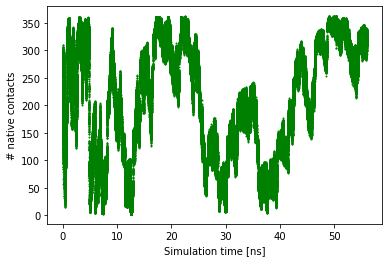

In [8]:
# visualize CV file
data=plumed.read_as_pandas("Exercise-2/run_2D/COLVAR")
# plot cv during simulation
plt.plot(data["time"]/1000.0,data["cv"],'o', ms=1, c="green")
# x-y axis labels
plt.xlabel("Simulation time [ns]")
plt.ylabel("# native contacts")

Text(0, 0.5, 'RMSD from State A [nm]')

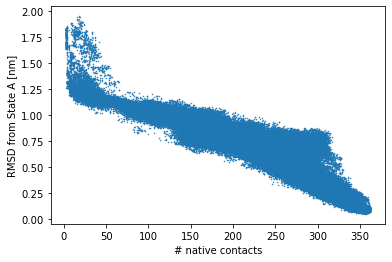

In [9]:
# plot cv vs RMSD from State A
plt.plot(data["cv"],data["rmsd_A"],'o', ms=0.5)
# x-y axis labels
plt.xlabel("# native contacts")
plt.ylabel("RMSD from State A [nm]")

Text(0, 0.5, 'RMSD from State B [nm]')

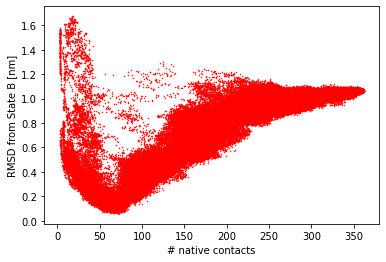

In [10]:
# plot cv vs RMSD from State B
plt.plot(data["cv"],data["rmsd_B"],'o', ms=0.5, c="r")
# x-y axis labels
plt.xlabel("# native contacts")
plt.ylabel("RMSD from State B [nm]")

In [11]:
%%bash
# compute free energy as a function of simulation time
cd Exercise-2/run_2D
plumed sum_hills --hills HILLS --stride 10000 --mintozero

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: F

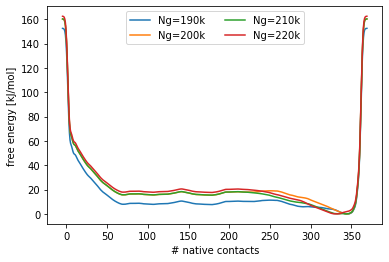

In [12]:
# plot free energy as a function of simulation time
for i in range(19,23,1):   
 # import fes file into pandas dataset
 data=plumed.read_as_pandas("Exercise-2/run_2D/fes_"+str(i)+".dat")
 # plot fes
 plt.plot(data["cv"],data["file.free"], label="Ng="+str(int(i)*10)+"k") 
# labels
plt.xlabel("# native contacts")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=2)

In [13]:
%%bash
# Exercise 2
cd Exercise-2/run_2D

# prepare PLUMED input file for reweighting
cat > "plumed_reweight.dat" << EOF
# reconstruct molecule
WHOLEMOLECULES ENTITY0=1-330

# CA-RMSDs from the two reference conformations
rmsd_A: RMSD REFERENCE=stateA.pdb TYPE=OPTIMAL NOPBC
rmsd_B: RMSD REFERENCE=stateB.pdb TYPE=OPTIMAL NOPBC

cv: COORDINATION ...
NOPBC 
GROUPA=1,1,1,2,2,2,2,2,3,3,3,3,4,5,5,6,9,10,10,10,10,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,16,16,16,16,16,18,18,18,18,19,21,22,22,22,22,22,22,24,25,25,25,27,27,27,27,27,27,27,27,28,28,28,28,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,32,32,32,32,32,32,34,34,34,38,39,41,41,41,47,47,47,48,48,48,52,52,57,57,60,62,62,63,63,63,66,68,68,68,68,83,84,84,84,84,84,84,89,89,89,93,95,98,101,101,101,101,101,101,103,103,104,104,104,104,104,104,104,105,107,107,107,107,107,108,109,109,110,111,111,114,114,114,114,114,114,114,116,116,116,116,119,119,119,120,120,120,120,120,126,126,126,126,128,128,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,133,133,133,133,133,135,140,141,141,141,141,141,144,144,144,144,145,145,145,145,149,149,149,149,151,151,153,153,153,153,153,153,154,154,154,158,160,160,160,160,162,166,166,166,169,169,169,174,174,174,174,174,174,174,176,176,176,176,176,178,178,178,178,180,180,180,184,186,186,186,186,188,188,188,189,189,189,191,191,191,191,191,191,193,193,193,193,195,195,196,197,197,197,197,197,200,200,200,200,200,202,202,202,204,204,204,204,204,205,205,207,207,207,207,207,209,209,209,209,210,211,212,212,212,212,212,212,212,212,213,213,213,213,216,216,216,216,218,218,218,220,220,220,220,220,220,220,221,221,221,223,223,223,223,223,223,225,225,225,226,226,232,232,232,232,232,235,235,235,236,236,236,236,237,239,239,239
GROUPB=110,115,122,106,108,110,112,115,95,96,98,102,112,95,98,112,123,95,102,106,115,106,108,112,115,123,203,205,92,102,103,104,106,113,202,205,208,92,94,96,102,106,82,92,94,96,96,78,79,80,92,94,96,99,205,78,82,92,60,68,70,72,78,82,84,92,60,68,70,311,82,92,102,104,205,310,311,60,68,82,84,92,104,221,309,310,311,68,70,72,78,82,92,70,72,75,71,73,72,74,75,58,71,74,70,71,72,69,71,86,87,221,218,221,236,237,279,295,82,84,93,221,229,217,218,219,221,229,231,229,231,237,229,229,229,215,217,219,224,229,231,215,224,202,204,208,215,217,219,220,203,201,202,208,210,215,202,210,213,210,213,215,133,199,201,203,208,210,215,199,201,203,204,192,199,201,188,203,204,205,327,194,199,201,208,286,287,194,196,197,199,206,284,300,199,208,210,212,213,285,286,287,192,194,196,197,199,196,199,187,192,194,195,196,185,187,192,195,185,187,189,199,185,187,195,196,195,196,170,175,176,177,185,195,177,179,182,177,175,177,186,328,189,189,327,328,186,188,328,313,315,316,317,323,325,328,313,315,317,323,328,315,317,319,323,317,319,320,328,303,313,315,323,310,313,315,323,327,328,300,302,303,307,310,313,300,302,307,310,302,303,303,284,291,301,302,303,300,302,307,310,313,300,307,310,300,302,307,310,313,310,313,281,283,291,300,310,281,283,285,291,287,267,267,270,274,281,283,285,287,288,267,270,287,288,274,278,281,291,278,279,281,278,279,281,283,291,293,300,278,279,293,264,266,274,277,278,281,266,267,268,268,271,266,268,274,277,278,266,274,278,274,277,278,279,279,256,258,265
PAIR SWITCH={CUSTOM FUNC=1-erf(x^4) R_0=1.0}
...

# metadynamics parameters
metad: METAD ARG=cv ...
  # Deposit a Gaussian every 10000000 time steps (never!), with initial height equal to 0.0 kJ/mol 
  PACE=10000000 HEIGHT=0.0 BIASFACTOR=60
  # Gaussian width (sigma) based on the CV fluctuations in unbiased run
  SIGMA=2.0
  # Gaussians will be written to file
  FILE=HILLS
  # Store MetaD bias potential on a grid
  GRID_MIN=0 GRID_MAX=400
  # Say that METAD should be restarting (= reading an existing HILLS file) 
  RESTART=YES # <- this is the new stuff! 
...

# Print out the values of cv and the metadynamics bias potential
PRINT ARG=cv,metad.bias STRIDE=1 FILE=COLVAR_REWEIGHT
EOF

# analyze with PLUMED driver
plumed driver --mf_trr traj.trr --plumed plumed_reweight.dat --kt 0.498868


DRIVER: Found molfile format trajectory trr with name traj.trr
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 330
PLUMED: File suffix: 
PLUMED: FILE: plumed_reweight.dat
PLUMED: Action WHOLEMOLECULES
PLUMED:   with label @0
PLUMED:   with stride 1
PLUMED:   atoms in entity 0 : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 

In [14]:
%%bash
# Exercise 2
cd Exercise-2/run_2D

# create cv.weight file with cv and weight from COLVAR_REWEIGHT
# find maximum of bias
bmax=`sort -n -k 3 COLVAR_REWEIGHT  | tail -n 1 | awk '{print $3}'`
# create cv.weight file
awk '{if($1!="#!") print $2,exp(($3-bm)/0.498868)}' bm=$bmax COLVAR_REWEIGHT > cv.weight

# and now do block analysis with block sizes from 1 to 1000 (every 10)
# create PLUMED-like header for output file
echo "#! FIELDS bsize err" > err.blocks
for i in `seq 1 10 2000`
do
 # run the python script
 python ../../data/do_block_fes.py cv.weight 1 0 400 100 0.498868 $i
 # calculate average error along the free-energy profile
 grep -v Inf fes.$i.dat | awk 'BEGIN{tot=0}{tot+=$3}END{print i,tot/NR}' i=$i
done >> err.blocks

Text(0, 0.5, 'Average free-energy error [kJ/mol]')

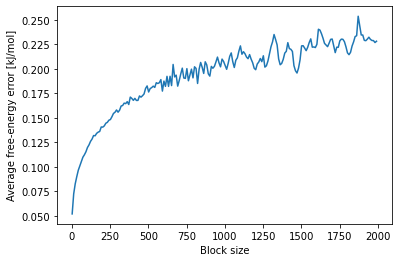

In [15]:
# import err.blocks file into pandas dataset
data=plumed.read_as_pandas("Exercise-2/run_2D/err.blocks")
# plot error as a function of block size
plt.plot(data["bsize"],data["err"])
# x-y axis labels
plt.xlabel("Block size")
plt.ylabel("Average free-energy error [kJ/mol]")

In [16]:
%%bash
# Exercise 2
cd Exercise-2

# Run production MetaD using optimized input file and Multiple Time Stepping with STRIDE=2
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2D-STRIDE_2; cd run_2D-STRIDE_2

# create PLUMED optimized input file
cat > "plumed_opt.dat" << EOF
# reconstruct molecule
WHOLEMOLECULES ENTITY0=1-330

# CA-RMSDs from the two reference conformations
rmsd_A: RMSD REFERENCE=stateA.pdb TYPE=OPTIMAL NOPBC
rmsd_B: RMSD REFERENCE=stateB.pdb TYPE=OPTIMAL NOPBC

cv: COORDINATION NOPBC GROUPA=1,1,1,2,2,2,2,2,3,3,3,3,4,5,5,6,9,10,10,10,10,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,16,16,16,16,16,18,18,18,18,19,21,22,22,22,22,22,22,24,25,25,25,27,27,27,27,27,27,27,27,28,28,28,28,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,32,32,32,32,32,32,34,34,34,38,39,41,41,41,47,47,47,48,48,48,52,52,57,57,60,62,62,63,63,63,66,68,68,68,68,83,84,84,84,84,84,84,89,89,89,93,95,98,101,101,101,101,101,101,103,103,104,104,104,104,104,104,104,105,107,107,107,107,107,108,109,109,110,111,111,114,114,114,114,114,114,114,116,116,116,116,119,119,119,120,120,120,120,120,126,126,126,126,128,128,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,133,133,133,133,133,135,140,141,141,141,141,141,144,144,144,144,145,145,145,145,149,149,149,149,151,151,153,153,153,153,153,153,154,154,154,158,160,160,160,160,162,166,166,166,169,169,169,174,174,174,174,174,174,174,176,176,176,176,176,178,178,178,178,180,180,180,184,186,186,186,186,188,188,188,189,189,189,191,191,191,191,191,191,193,193,193,193,195,195,196,197,197,197,197,197,200,200,200,200,200,202,202,202,204,204,204,204,204,205,205,207,207,207,207,207,209,209,209,209,210,211,212,212,212,212,212,212,212,212,213,213,213,213,216,216,216,216,218,218,218,220,220,220,220,220,220,220,221,221,221,223,223,223,223,223,223,225,225,225,226,226,232,232,232,232,232,235,235,235,236,236,236,236,237,239,239,239 GROUPB=110,115,122,106,108,110,112,115,95,96,98,102,112,95,98,112,123,95,102,106,115,106,108,112,115,123,203,205,92,102,103,104,106,113,202,205,208,92,94,96,102,106,82,92,94,96,96,78,79,80,92,94,96,99,205,78,82,92,60,68,70,72,78,82,84,92,60,68,70,311,82,92,102,104,205,310,311,60,68,82,84,92,104,221,309,310,311,68,70,72,78,82,92,70,72,75,71,73,72,74,75,58,71,74,70,71,72,69,71,86,87,221,218,221,236,237,279,295,82,84,93,221,229,217,218,219,221,229,231,229,231,237,229,229,229,215,217,219,224,229,231,215,224,202,204,208,215,217,219,220,203,201,202,208,210,215,202,210,213,210,213,215,133,199,201,203,208,210,215,199,201,203,204,192,199,201,188,203,204,205,327,194,199,201,208,286,287,194,196,197,199,206,284,300,199,208,210,212,213,285,286,287,192,194,196,197,199,196,199,187,192,194,195,196,185,187,192,195,185,187,189,199,185,187,195,196,195,196,170,175,176,177,185,195,177,179,182,177,175,177,186,328,189,189,327,328,186,188,328,313,315,316,317,323,325,328,313,315,317,323,328,315,317,319,323,317,319,320,328,303,313,315,323,310,313,315,323,327,328,300,302,303,307,310,313,300,302,307,310,302,303,303,284,291,301,302,303,300,302,307,310,313,300,307,310,300,302,307,310,313,310,313,281,283,291,300,310,281,283,285,291,287,267,267,270,274,281,283,285,287,288,267,270,287,288,274,278,281,291,278,279,281,278,279,281,283,291,293,300,278,279,293,264,266,274,277,278,281,266,267,268,268,271,266,268,274,277,278,266,274,278,274,277,278,279,279,256,258,265 PAIR SWITCH={CUSTOM FUNC=1-erf(x^4) R_0=1.0}

# metadynamics parameters
metad: METAD ARG=cv ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 60
  PACE=500 HEIGHT=1.2 BIASFACTOR=60
  # Gaussian width (sigma) based on the CV fluctuations in unbiased run
  SIGMA=2.0
  # Store MetaD bias potential on a grid
  GRID_MIN=0 GRID_MAX=400
  # Gaussians will be written to file
  FILE=HILLS
  # Multiple time stepping
  STRIDE=2
...

# Energy drift
EFFECTIVE_ENERGY_DRIFT PRINT_STRIDE=500 FILE=COLVAR_ENE

# print useful stuff
PRINT ARG=cv,rmsd_A,rmsd_B,metad.bias STRIDE=500 FILE=COLVAR
EOF

# link useful files here
ln -s ../../data/exercise2/* . 2>/dev/null

# Run MetaD using optimize PLUMED input file (using 4 cores)
#gmx_mpi mdrun -s topol.tpr -plumed plumed_opt.dat -noddcheck -pin on -ntomp 4

mkdir: run_2D-STRIDE_2: File exists


In [17]:
%%bash
# Exercise 2
cd Exercise-2

# Run production MetaD using optimized input file and Multiple Time Stepping with STRIDE=4
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2D-STRIDE_4; cd run_2D-STRIDE_4

# create PLUMED optimized input file
cat > "plumed_opt.dat" << EOF
# reconstruct molecule
WHOLEMOLECULES ENTITY0=1-330

# CA-RMSDs from the two reference conformations
rmsd_A: RMSD REFERENCE=stateA.pdb TYPE=OPTIMAL NOPBC
rmsd_B: RMSD REFERENCE=stateB.pdb TYPE=OPTIMAL NOPBC

cv: COORDINATION NOPBC GROUPA=1,1,1,2,2,2,2,2,3,3,3,3,4,5,5,6,9,10,10,10,10,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,16,16,16,16,16,18,18,18,18,19,21,22,22,22,22,22,22,24,25,25,25,27,27,27,27,27,27,27,27,28,28,28,28,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,32,32,32,32,32,32,34,34,34,38,39,41,41,41,47,47,47,48,48,48,52,52,57,57,60,62,62,63,63,63,66,68,68,68,68,83,84,84,84,84,84,84,89,89,89,93,95,98,101,101,101,101,101,101,103,103,104,104,104,104,104,104,104,105,107,107,107,107,107,108,109,109,110,111,111,114,114,114,114,114,114,114,116,116,116,116,119,119,119,120,120,120,120,120,126,126,126,126,128,128,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,133,133,133,133,133,135,140,141,141,141,141,141,144,144,144,144,145,145,145,145,149,149,149,149,151,151,153,153,153,153,153,153,154,154,154,158,160,160,160,160,162,166,166,166,169,169,169,174,174,174,174,174,174,174,176,176,176,176,176,178,178,178,178,180,180,180,184,186,186,186,186,188,188,188,189,189,189,191,191,191,191,191,191,193,193,193,193,195,195,196,197,197,197,197,197,200,200,200,200,200,202,202,202,204,204,204,204,204,205,205,207,207,207,207,207,209,209,209,209,210,211,212,212,212,212,212,212,212,212,213,213,213,213,216,216,216,216,218,218,218,220,220,220,220,220,220,220,221,221,221,223,223,223,223,223,223,225,225,225,226,226,232,232,232,232,232,235,235,235,236,236,236,236,237,239,239,239 GROUPB=110,115,122,106,108,110,112,115,95,96,98,102,112,95,98,112,123,95,102,106,115,106,108,112,115,123,203,205,92,102,103,104,106,113,202,205,208,92,94,96,102,106,82,92,94,96,96,78,79,80,92,94,96,99,205,78,82,92,60,68,70,72,78,82,84,92,60,68,70,311,82,92,102,104,205,310,311,60,68,82,84,92,104,221,309,310,311,68,70,72,78,82,92,70,72,75,71,73,72,74,75,58,71,74,70,71,72,69,71,86,87,221,218,221,236,237,279,295,82,84,93,221,229,217,218,219,221,229,231,229,231,237,229,229,229,215,217,219,224,229,231,215,224,202,204,208,215,217,219,220,203,201,202,208,210,215,202,210,213,210,213,215,133,199,201,203,208,210,215,199,201,203,204,192,199,201,188,203,204,205,327,194,199,201,208,286,287,194,196,197,199,206,284,300,199,208,210,212,213,285,286,287,192,194,196,197,199,196,199,187,192,194,195,196,185,187,192,195,185,187,189,199,185,187,195,196,195,196,170,175,176,177,185,195,177,179,182,177,175,177,186,328,189,189,327,328,186,188,328,313,315,316,317,323,325,328,313,315,317,323,328,315,317,319,323,317,319,320,328,303,313,315,323,310,313,315,323,327,328,300,302,303,307,310,313,300,302,307,310,302,303,303,284,291,301,302,303,300,302,307,310,313,300,307,310,300,302,307,310,313,310,313,281,283,291,300,310,281,283,285,291,287,267,267,270,274,281,283,285,287,288,267,270,287,288,274,278,281,291,278,279,281,278,279,281,283,291,293,300,278,279,293,264,266,274,277,278,281,266,267,268,268,271,266,268,274,277,278,266,274,278,274,277,278,279,279,256,258,265 PAIR SWITCH={CUSTOM FUNC=1-erf(x^4) R_0=1.0}

# metadynamics parameters
metad: METAD ARG=cv ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 60
  PACE=500 HEIGHT=1.2 BIASFACTOR=60
  # Gaussian width (sigma) based on the CV fluctuations in unbiased run
  SIGMA=2.0
  # Store MetaD bias potential on a grid
  GRID_MIN=0 GRID_MAX=400
  # Gaussians will be written to file
  FILE=HILLS
  # Multiple time stepping
  STRIDE=4
...

# Energy drift
EFFECTIVE_ENERGY_DRIFT PRINT_STRIDE=500 FILE=COLVAR_ENE

# print useful stuff
PRINT ARG=cv,rmsd_A,rmsd_B,metad.bias STRIDE=500 FILE=COLVAR
EOF

# link useful files here
ln -s ../../data/exercise2/* . 2>/dev/null

# Run MetaD using optimize PLUMED input file (using 4 cores)
#gmx_mpi mdrun -s topol.tpr -plumed plumed_opt.dat -noddcheck -pin on -ntomp 4

mkdir: run_2D-STRIDE_4: File exists


In [18]:
%%bash
# Exercise 2
cd Exercise-2

# First we measure the performances of the runs with STRIDE=1, 2, and 4
grep -B1 Perf run_2D/md.log run_2D-STRIDE_2/md.log run_2D-STRIDE_4/md.log

run_2D/md.log-                 (ns/day)    (hour/ns)
run_2D/md.log:Performance:      322.797        0.074
--
run_2D-STRIDE_2/md.log-                 (ns/day)    (hour/ns)
run_2D-STRIDE_2/md.log:Performance:      366.119        0.066
--
run_2D-STRIDE_4/md.log-                 (ns/day)    (hour/ns)
run_2D-STRIDE_4/md.log:Performance:      367.190        0.065


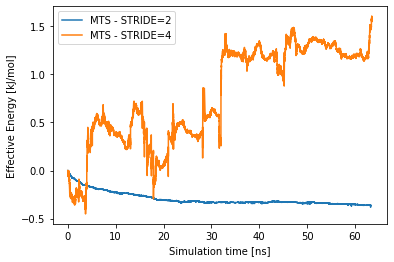

In [19]:
# and the effective energy conservation when using Multiple Time Stepping
data_2=plumed.read_as_pandas("Exercise-2/run_2D-STRIDE_2/COLVAR_ENE")
data_4=plumed.read_as_pandas("Exercise-2/run_2D-STRIDE_4/COLVAR_ENE")
# plot error as a function of block size
plt.plot(data_2["time"]/1000.0,data_2["effective-energy"], label="MTS - STRIDE=2")
plt.plot(data_4["time"]/1000.0,data_4["effective-energy"], label="MTS - STRIDE=4")
# x-y axis labels
plt.xlabel("Simulation time [ns]")
plt.ylabel("Effective Energy [kJ/mol]")
plt.legend()

In [20]:
%%bash
# Exercise 2
cd Exercise-2

# now we calculate the final free-energy for STRIDE=1, 2, and 4
cd run_2D
plumed sum_hills --hills HILLS --mintozero
cd ../run_2D-STRIDE_2
plumed sum_hills --hills HILLS --mintozero
cd ../run_2D-STRIDE_4
plumed sum_hills --hills HILLS --mintozero

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: F

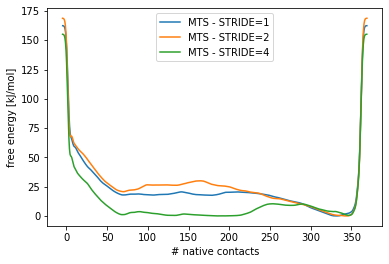

In [21]:
# read free energies as pandas datasets
data_1=plumed.read_as_pandas("Exercise-2/run_2D/fes.dat")
data_2=plumed.read_as_pandas("Exercise-2/run_2D-STRIDE_2/fes.dat")
data_4=plumed.read_as_pandas("Exercise-2/run_2D-STRIDE_4/fes.dat")

# plot fes
plt.plot(data_1["cv"],data_1["file.free"], label="MTS - STRIDE=1")
plt.plot(data_2["cv"],data_2["file.free"], label="MTS - STRIDE=2")
plt.plot(data_4["cv"],data_4["file.free"], label="MTS - STRIDE=4")


# labels
plt.xlabel("# native contacts")
plt.ylabel("free energy [kJ/mol]")
plt.legend()

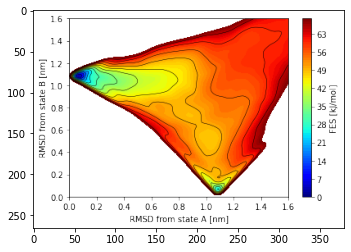

In [22]:
# from Masterclass 21.4: fes as function of RMSD State A and B
img = mpimg.imread('old_fes.png')
plt.imshow(img)

In [23]:
%%bash
# Exercise 2
cd Exercise-2

# now we want to measure the effect of using GRIDs in Metadynamics
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2E; cd run_2E

# create PLUMED optimized input file
cat > "plumed_opt.dat" << EOF
RESTART
# reconstruct molecule
WHOLEMOLECULES ENTITY0=1-330

# CA-RMSDs from the two reference conformations
rmsd_A: RMSD REFERENCE=stateA.pdb TYPE=OPTIMAL NOPBC
rmsd_B: RMSD REFERENCE=stateB.pdb TYPE=OPTIMAL NOPBC

cv: COORDINATION NOPBC GROUPA=1,1,1,2,2,2,2,2,3,3,3,3,4,5,5,6,9,10,10,10,10,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,16,16,16,16,16,18,18,18,18,19,21,22,22,22,22,22,22,24,25,25,25,27,27,27,27,27,27,27,27,28,28,28,28,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,32,32,32,32,32,32,34,34,34,38,39,41,41,41,47,47,47,48,48,48,52,52,57,57,60,62,62,63,63,63,66,68,68,68,68,83,84,84,84,84,84,84,89,89,89,93,95,98,101,101,101,101,101,101,103,103,104,104,104,104,104,104,104,105,107,107,107,107,107,108,109,109,110,111,111,114,114,114,114,114,114,114,116,116,116,116,119,119,119,120,120,120,120,120,126,126,126,126,128,128,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,133,133,133,133,133,135,140,141,141,141,141,141,144,144,144,144,145,145,145,145,149,149,149,149,151,151,153,153,153,153,153,153,154,154,154,158,160,160,160,160,162,166,166,166,169,169,169,174,174,174,174,174,174,174,176,176,176,176,176,178,178,178,178,180,180,180,184,186,186,186,186,188,188,188,189,189,189,191,191,191,191,191,191,193,193,193,193,195,195,196,197,197,197,197,197,200,200,200,200,200,202,202,202,204,204,204,204,204,205,205,207,207,207,207,207,209,209,209,209,210,211,212,212,212,212,212,212,212,212,213,213,213,213,216,216,216,216,218,218,218,220,220,220,220,220,220,220,221,221,221,223,223,223,223,223,223,225,225,225,226,226,232,232,232,232,232,235,235,235,236,236,236,236,237,239,239,239 GROUPB=110,115,122,106,108,110,112,115,95,96,98,102,112,95,98,112,123,95,102,106,115,106,108,112,115,123,203,205,92,102,103,104,106,113,202,205,208,92,94,96,102,106,82,92,94,96,96,78,79,80,92,94,96,99,205,78,82,92,60,68,70,72,78,82,84,92,60,68,70,311,82,92,102,104,205,310,311,60,68,82,84,92,104,221,309,310,311,68,70,72,78,82,92,70,72,75,71,73,72,74,75,58,71,74,70,71,72,69,71,86,87,221,218,221,236,237,279,295,82,84,93,221,229,217,218,219,221,229,231,229,231,237,229,229,229,215,217,219,224,229,231,215,224,202,204,208,215,217,219,220,203,201,202,208,210,215,202,210,213,210,213,215,133,199,201,203,208,210,215,199,201,203,204,192,199,201,188,203,204,205,327,194,199,201,208,286,287,194,196,197,199,206,284,300,199,208,210,212,213,285,286,287,192,194,196,197,199,196,199,187,192,194,195,196,185,187,192,195,185,187,189,199,185,187,195,196,195,196,170,175,176,177,185,195,177,179,182,177,175,177,186,328,189,189,327,328,186,188,328,313,315,316,317,323,325,328,313,315,317,323,328,315,317,319,323,317,319,320,328,303,313,315,323,310,313,315,323,327,328,300,302,303,307,310,313,300,302,307,310,302,303,303,284,291,301,302,303,300,302,307,310,313,300,307,310,300,302,307,310,313,310,313,281,283,291,300,310,281,283,285,291,287,267,267,270,274,281,283,285,287,288,267,270,287,288,274,278,281,291,278,279,281,278,279,281,283,291,293,300,278,279,293,264,266,274,277,278,281,266,267,268,268,271,266,268,274,277,278,266,274,278,274,277,278,279,279,256,258,265 PAIR SWITCH={CUSTOM FUNC=1-erf(x^4) R_0=1.0}

# metadynamics parameters
metad: METAD ARG=cv ...
  # Deposit a Gaussian every 500 time steps, with initial height
  # equal to 1.2 kJ/mol and bias factor equal to 60
  PACE=500 HEIGHT=1.2 BIASFACTOR=60
  # Gaussian width (sigma) based on the CV fluctuations in unbiased run
  SIGMA=2.0
  # Gaussians will be written to file
  FILE=../run_2D/HILLS
...

# print useful stuff
PRINT ARG=cv,rmsd_A,rmsd_B,metad.bias STRIDE=500 FILE=COLVAR
EOF

# link useful files here
ln -s ../../data/exercise2/* . 2>/dev/null

# Run MetaD using optimized PLUMED input file (using 4 cores)
#gmx_mpi mdrun -s topol.tpr -plumed plumed_opt.dat -noddcheck -pin on -ntomp 4 -maxh 1.0

mkdir: run_2E: File exists


In [24]:
%%bash
# Exercise 2
cd Exercise-2

# let's compare the performances with/without GRID
grep -B1 Perf run_2C/md.log run_2D/md.log run_2E/md.log

run_2C/md.log-                 (ns/day)    (hour/ns)
run_2C/md.log:Performance:      317.132        0.076
--
run_2D/md.log-                 (ns/day)    (hour/ns)
run_2D/md.log:Performance:      322.797        0.074
--
run_2E/md.log-                 (ns/day)    (hour/ns)
run_2E/md.log:Performance:        3.570        6.722


In [25]:
%%bash
# Exercise 2
cd Exercise-2

# now we want to measure the effect of using the AsmJit library
# Info machine: cores: 16  * CPU: Intel(R) Xeon(R) CPU E5-2667 v4 @ 3.20GHz * GPU: TITAN X (Pascal)
mkdir run_2F; cd run_2F

# link useful files here
ln -s ../../data/exercise2/* . 2>/dev/null

# deactivate AsmJit library
export PLUMED_USE_ASMJIT=no
# run using input file of run_2D
#gmx_mpi mdrun -s topol.tpr -plumed ../run_2C/plumed_opt.dat -noddcheck -pin on -ntomp 4 -maxh 1.0

# extract performances
grep -B1 Perf md.log

                 (ns/day)    (hour/ns)
Performance:      297.694        0.081


mkdir: run_2F: File exists


Text(0, 0.5, 'Performance [ns/day]')

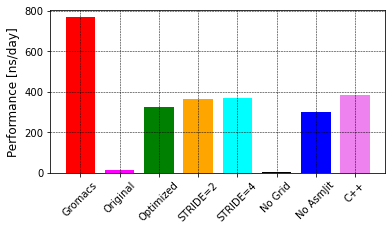

In [26]:
# final performance plot
data=[766.272,14.950,322.797,366.119,367.190,3.570,297.694,382.820]
label=["Gromacs","Original","Optimized","STRIDE=2","STRIDE=4","No Grid","No AsmJit","C++"]
c=['red', 'magenta', 'green', 'orange', 'cyan', 'black', 'blue', 'violet']
ind=list(range(0,len(data)))
# make bar plot
plt.figure(figsize=(6,3))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.bar(ind, data, 0.75, color=c)
plt.xticks(ind, label, rotation=45)
plt.ylabel("Performance [ns/day]", size="large")